In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import SimpleRNN, Dense, Flatten


In [2]:
model = keras.Sequential([
    SimpleRNN(3, input_shape= (4, 5)),
    Dense(1, activation= 'sigmoid')
])

model.summary()

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

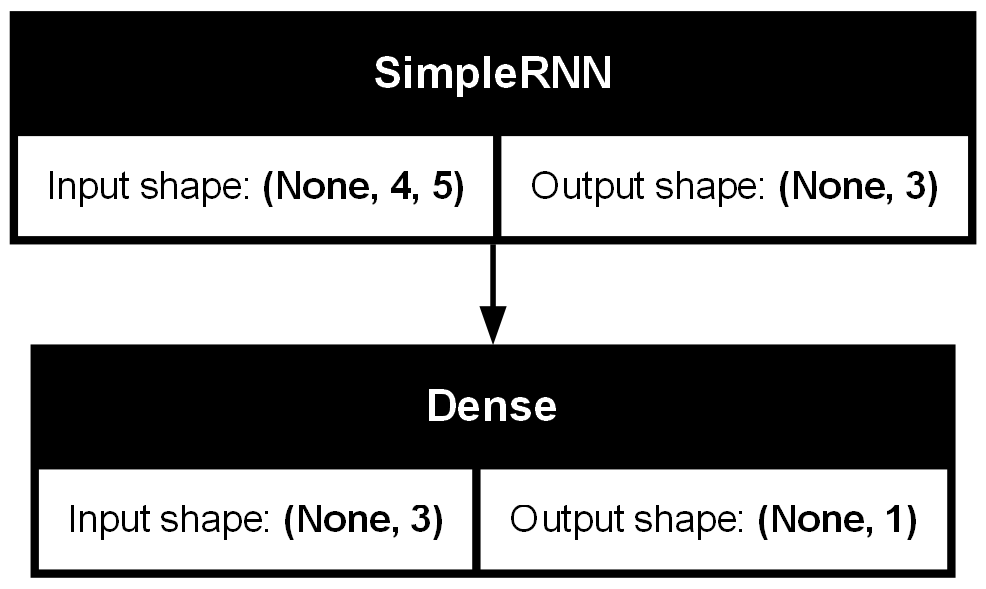

In [3]:
from keras.utils import plot_model

plot_model(model, show_shapes= True)

In [4]:
print(model.get_weights()[0].shape)
model.get_weights()[0]

(5, 3)


array([[ 0.317061  , -0.52459186, -0.7565922 ],
       [ 0.8491942 ,  0.63028663,  0.06611276],
       [-0.7980246 , -0.1885674 ,  0.08918422],
       [ 0.61515707, -0.50062776, -0.8654074 ],
       [ 0.04978687,  0.5943696 , -0.665153  ]], dtype=float32)

### Physics Analogy to SimpleRNN

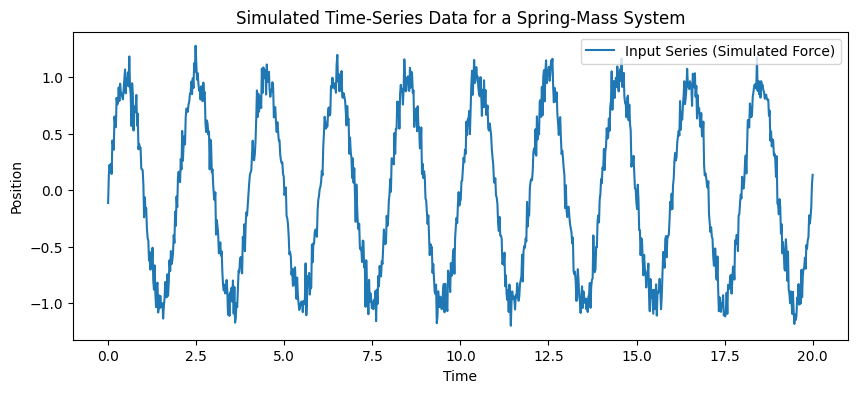

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters for synthetic data
num_samples= 1000
time_steps= np.linspace(0, 20, num_samples)
amplitude = 1.0
frequency = 0.5
noise_level = 0.1

## Generate a sinusodial wave with noise
input_series = amplitude * np.sin(2*np.pi*frequency*time_steps)
input_series += noise_level * np.random.randn(num_samples)

# Plot the generated time-series data
plt.figure(figsize=(10, 4))
plt.plot(time_steps, input_series, label='Input Series (Simulated Force)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simulated Time-Series Data for a Spring-Mass System')
plt.legend()
plt.show()

In [6]:
import pandas as pd
window_size= 20
df = pd.DataFrame(input_series, columns= ['value'])

X= []
y = []
for i in range(len(df) - window_size):
    X.append(df['value'].iloc[i: i + window_size])
    y.append(df['value'].iloc[i + window_size])
    

# Convert to numpy arrays and reshape
X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y).reshape(-1, 1)
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (980, 20, 1)
Output shape: (980, 1)


In [7]:
### Defining the simple rnn model
from keras.models import Sequential

model = Sequential([
    SimpleRNN(50, activation= 'tanh', input_shape= (window_size, 1), return_sequences= False),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse', metrics= ['r2_score'])
model.summary()

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X, y, epochs= 4, batch_size= 1, validation_split= 0.2)


Epoch 1/4
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0421 - r2_score: 0.8795 - val_loss: 0.0164 - val_r2_score: 0.9680
Epoch 2/4
784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0186 - r2_score: 0.9630 - val_loss: 0.0144 - val_r2_score: 0.9719
Epoch 3/4
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0172 - r2_score: 0.9660 - val_loss: 0.0244 - val_r2_score: 0.9523
Epoch 4/4
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0184 - r2_score: 0.9626 - val_loss: 0.0173 - val_r2_score: 0.9662


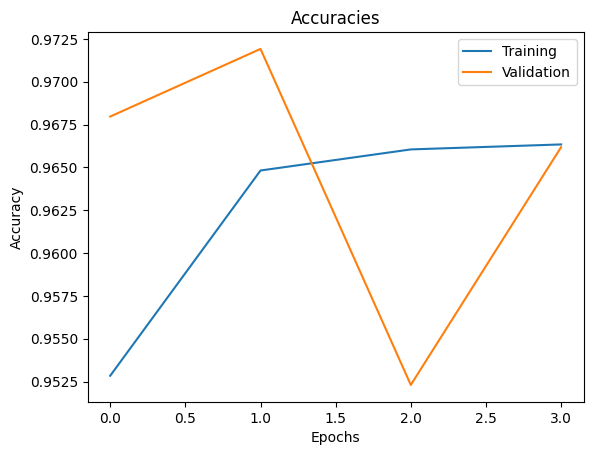

In [9]:
plt.plot(history.history['r2_score'], label= 'Training')
plt.plot(history.history['val_r2_score'], label= 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracies')
plt.legend()
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


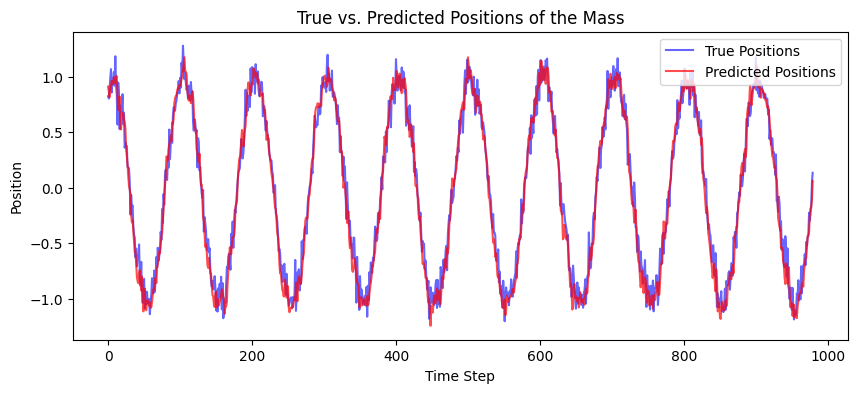

In [10]:
# Make predictions
predictions = model.predict(X)

# Plot the actual vs. predicted positions
plt.figure(figsize=(10, 4))
plt.plot(range(len(y)), y, label='True Positions', color='blue', alpha=0.6)
plt.plot(range(len(predictions)), predictions, label='Predicted Positions', color='red', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('True vs. Predicted Positions of the Mass')
plt.legend()
plt.show()


In [11]:
model.predict(X[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.9096338]], dtype=float32)